# Profile: Look at how many results we have for each race
Profile the featurized_race_data_v2 data and see how many results we have for each race and for each year.  Highlight major races (by number of participants) that have gaps in their race years.

Loading featurized_race_data_v2.csv...
Total records: 1,688,270
Date range: 2000-01-08 to 2023-12-31
Year range: 2000 to 2023
Number of unique races: 1278

RESULTS PER RACE (Top 50)

Top 50 races by participant count:
  1. city_of_los_angeles_marathon_(l.a._marathon)                       133,561 results
  2. chicago_marathon                                                   128,585 results
  3. marine_corps_marathon                                               89,408 results
  4. new_york_city_marathon                                              74,800 results
  5. boston_marathon                                                     74,144 results
  6. honolulu_marathon                                                   65,784 results
  7. rock_'n'_roll_marathon                                              62,793 results
  8. philadelphia_marathon                                               47,048 results
  9. portland_marathon                                                   43,99

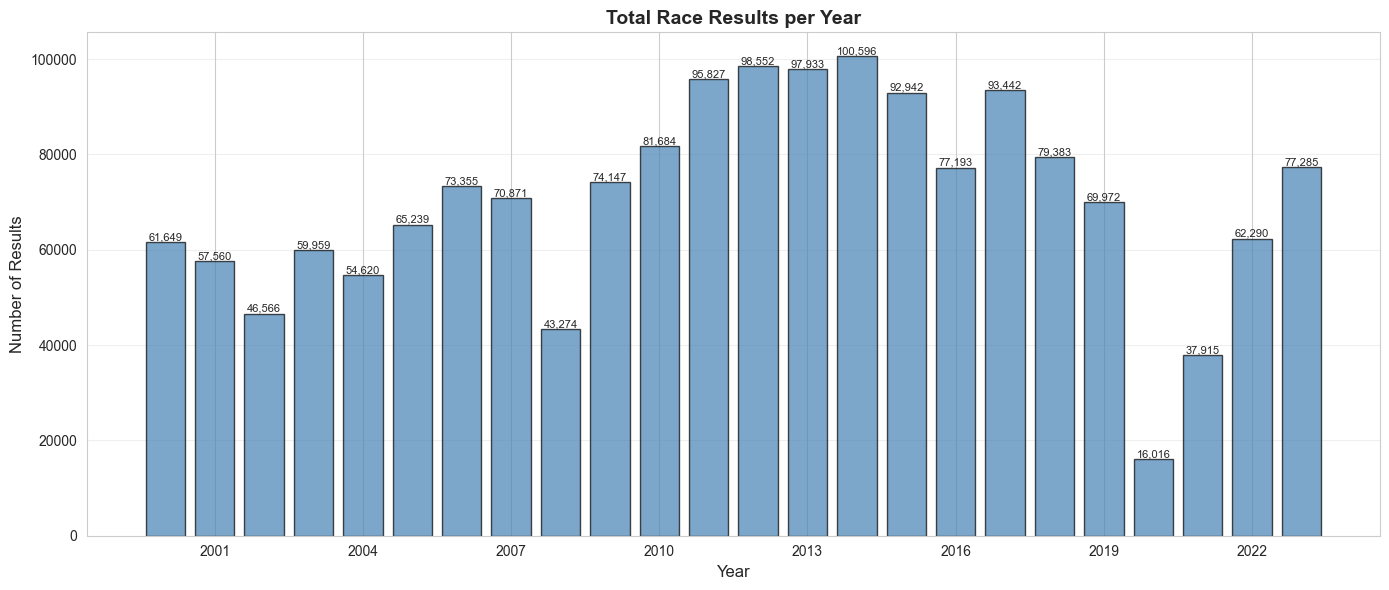


MAJOR RACES: Year Coverage Analysis

Top 20 races with year coverage analysis:
                                        race  total_results year_range  years_with_data  expected_years  missing_years                                          missing_year_list
city_of_los_angeles_marathon_(l.a._marathon)         133561  2001-2023               22              23              1                                                       2008
                            chicago_marathon         128585  2000-2017               12              18              6                         2002, 2004, 2005, 2008, 2009, 2010
                       marine_corps_marathon          89408  2000-2018               17              19              2                                                 2001, 2006
                      new_york_city_marathon          74800  2017-2023                6               7              1                                                       2020
                             b

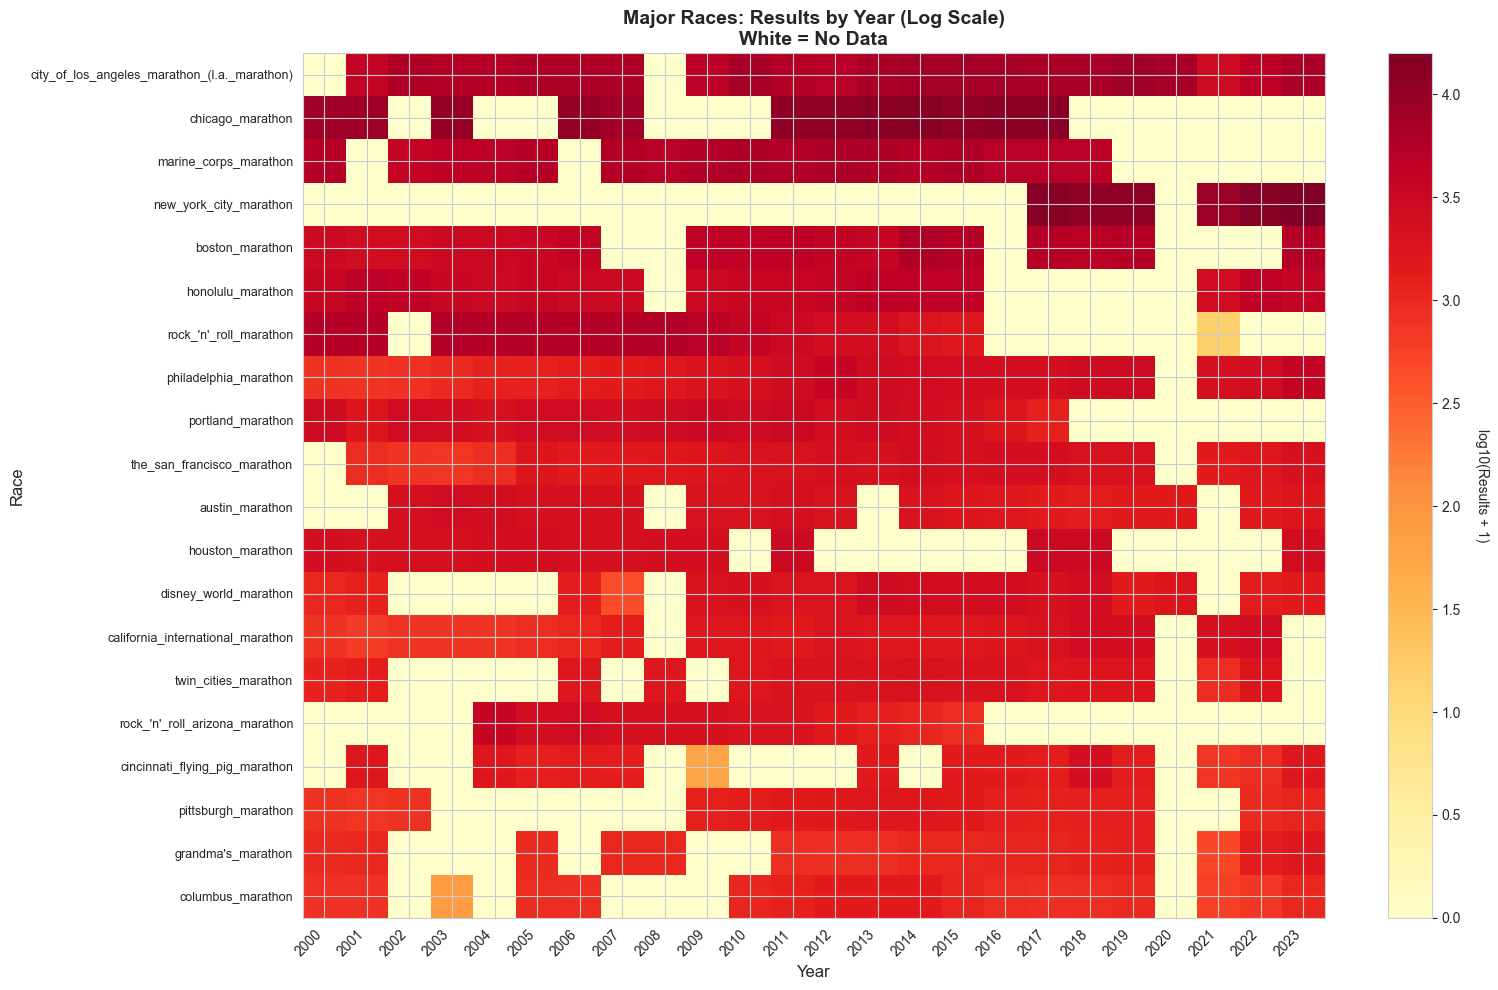


SUMMARY STATISTICS

Total races: 1,278
Total results: 1,688,270
Average results per race: 1,321
Median results per race: 66

Races with only 1 year of data: 236
Races with 5+ years of data: 637
Races with 10+ years of data: 300

Results per race distribution:
  < 100 results: 725 races
  100-1,000 results: 383 races
  1,000-10,000 results: 145 races
  10,000+ results: 25 races


In [2]:
# Profile: Race Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Load data
print("Loading featurized_race_data_v2.csv...")
print("="*80)
df = pd.read_csv('../data/featurized_race_data_v2.csv')

# Extract year from date
df['year'] = pd.to_datetime(df['date']).dt.year

print(f"Total records: {len(df):,}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Year range: {df['year'].min()} to {df['year'].max()}")
print(f"Number of unique races: {df['race'].nunique()}")

# 1. Results per race (sorted by count)
print("\n" + "="*80)
print("RESULTS PER RACE (Top 50)")
print("="*80)

race_counts = df.groupby('race').size().sort_values(ascending=False)
print(f"\nTop 50 races by participant count:")
for i, (race, count) in enumerate(race_counts.head(50).items(), 1):
    print(f"{i:3}. {race:65} {count:>8,} results")

# 2. Results per year
print("\n" + "="*80)
print("RESULTS PER YEAR")
print("="*80)

year_counts = df.groupby('year').size().sort_values()
print(year_counts)

# Visualization: Results per year
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(year_counts.index, year_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
ax.set_title('Total Race Results per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Results', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add value labels on bars
for year, count in zip(year_counts.index, year_counts.values):
    ax.text(year, count, f'{count:,}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

# 3. Identify major races and their year coverage
print("\n" + "="*80)
print("MAJOR RACES: Year Coverage Analysis")
print("="*80)

# Define "major" as top 20 races by participant count
major_races = race_counts.head(20).index.tolist()

# For each major race, get year range and identify gaps
race_year_data = []

for race in major_races:
    race_df = df[df['race'] == race]
    years_present = sorted(race_df['year'].unique())
    
    min_year = min(years_present)
    max_year = max(years_present)
    expected_years = set(range(min_year, max_year + 1))
    actual_years = set(years_present)
    missing_years = sorted(expected_years - actual_years)
    
    total_results = len(race_df)
    
    race_year_data.append({
        'race': race,
        'total_results': total_results,
        'year_range': f"{min_year}-{max_year}",
        'years_with_data': len(years_present),
        'expected_years': len(expected_years),
        'missing_years': len(missing_years),
        'missing_year_list': ', '.join(map(str, missing_years)) if missing_years else 'None'
    })

race_year_df = pd.DataFrame(race_year_data)
race_year_df = race_year_df.sort_values('total_results', ascending=False)

print("\nTop 20 races with year coverage analysis:")
print(race_year_df.to_string(index=False))

# Highlight races with gaps
print("\n" + "="*80)
print("MAJOR RACES WITH GAPS IN COVERAGE")
print("="*80)

races_with_gaps = race_year_df[race_year_df['missing_years'] > 0]

if len(races_with_gaps) > 0:
    print(f"\nFound {len(races_with_gaps)} major races with gaps:\n")
    for _, row in races_with_gaps.iterrows():
        print(f"Race: {row['race']}")
        print(f"  Total results: {row['total_results']:,}")
        print(f"  Year range: {row['year_range']}")
        print(f"  Missing {row['missing_years']} years: {row['missing_year_list']}")
        print()
else:
    print("\nNo gaps found in major races!")

# 4. Visualization: Heatmap of major races by year
print("\n" + "="*80)
print("VISUALIZATION: Major Races by Year")
print("="*80)

# Create pivot table for heatmap (presence/absence)
major_race_df = df[df['race'].isin(major_races)]
race_year_pivot = major_race_df.groupby(['race', 'year']).size().unstack(fill_value=0)

# Sort by total results
race_order = race_counts[race_counts.index.isin(major_races)].index.tolist()
race_year_pivot = race_year_pivot.reindex(race_order)

# Plot heatmap
fig, ax = plt.subplots(figsize=(16, 10))

# Use log scale for better visualization (since counts vary widely)
# Add 1 to avoid log(0)
heatmap_data = np.log10(race_year_pivot + 1)

im = ax.imshow(heatmap_data, cmap='YlOrRd', aspect='auto', interpolation='nearest')

# Set ticks
ax.set_xticks(range(len(race_year_pivot.columns)))
ax.set_xticklabels(race_year_pivot.columns, rotation=45, ha='right')
ax.set_yticks(range(len(race_year_pivot.index)))
ax.set_yticklabels(race_year_pivot.index, fontsize=9)

ax.set_title('Major Races: Results by Year (Log Scale)\nWhite = No Data', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Race', fontsize=12)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('log10(Results + 1)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# 5. Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nTotal races: {df['race'].nunique():,}")
print(f"Total results: {len(df):,}")
print(f"Average results per race: {len(df) / df['race'].nunique():,.0f}")
print(f"Median results per race: {race_counts.median():,.0f}")
print(f"\nRaces with only 1 year of data: {(race_counts.groupby(df.groupby('race')['year'].nunique()).size().get(1, 0)):,}")
print(f"Races with 5+ years of data: {(df.groupby('race')['year'].nunique() >= 5).sum():,}")
print(f"Races with 10+ years of data: {(df.groupby('race')['year'].nunique() >= 10).sum():,}")

# Distribution of results per race
print(f"\nResults per race distribution:")
print(f"  < 100 results: {(race_counts < 100).sum():,} races")
print(f"  100-1,000 results: {((race_counts >= 100) & (race_counts < 1000)).sum():,} races")
print(f"  1,000-10,000 results: {((race_counts >= 1000) & (race_counts < 10000)).sum():,} races")
print(f"  10,000+ results: {(race_counts >= 10000).sum():,} races")

In [3]:
# 6. Generate CSV of missing years for top 85 marathons with expected participant estimates
print("\n" + "="*80)
print("MISSING YEARS ANALYSIS: Top 85 Marathons")
print("="*80)

# Identify top 85 races by total participant count
top_85_races = race_counts.head(85).index.tolist()

print(f"\nAnalyzing top 85 races by participant count...")
print(f"These races have a combined {race_counts.head(85).sum():,} results")

# For each race, identify missing years and estimate expected participants
missing_years_data = []

for race in top_85_races:
    race_df = df[df['race'] == race]
    
    # Get years with data and their participant counts
    year_counts_race = race_df.groupby('year').size()
    years_present = sorted(year_counts_race.index)
    
    if len(years_present) < 2:
        # Skip races with only 1 year of data (no range to check for gaps)
        continue
    
    min_year = min(years_present)
    max_year = max(years_present)
    expected_years = set(range(min_year, max_year + 1))
    actual_years = set(years_present)
    missing_years = sorted(expected_years - actual_years)
    
    # For each missing year, estimate expected participants
    for missing_year in missing_years:
        # Look at nearby years (±3 years window) to estimate
        nearby_years = [y for y in years_present 
                       if abs(y - missing_year) <= 3 and y != missing_year]
        
        if nearby_years:
            # Average participant count from nearby years
            nearby_counts = [year_counts_race[y] for y in nearby_years]
            expected_participants = int(np.mean(nearby_counts))
        else:
            # Fallback: use overall average for this race if no nearby years
            expected_participants = int(year_counts_race.mean())
        
        missing_years_data.append({
            'race': race,
            'missing_year': missing_year,
            'expected_participants': expected_participants,
            'total_race_results': len(race_df),
            'year_range': f"{min_year}-{max_year}",
            'nearby_years_used': ', '.join(map(str, nearby_years[:5]))  # Show up to 5 nearby years
        })

# Create DataFrame
missing_years_df = pd.DataFrame(missing_years_data)

if len(missing_years_df) > 0:
    # Sort by race (by total results descending), then by year
    race_order_dict = {race: idx for idx, race in enumerate(top_85_races)}
    missing_years_df['race_order'] = missing_years_df['race'].map(race_order_dict)
    missing_years_df = missing_years_df.sort_values(['race_order', 'missing_year'])
    missing_years_df = missing_years_df.drop('race_order', axis=1)
    
    # Save to CSV
    output_file = '../data/missing_race_years_top85.csv'
    # Keep only the main columns for the CSV
    output_df = missing_years_df[['race', 'missing_year', 'expected_participants']].copy()
    output_df.to_csv(output_file, index=False)
    
    print(f"\n✓ Saved to: {output_file}")
    print(f"  Total missing year entries: {len(output_df):,}")
    print(f"  Unique races with gaps: {output_df['race'].nunique()}")
    print(f"  Total expected participants if filled: {output_df['expected_participants'].sum():,}")
    
    # Show summary
    print("\n" + "="*80)
    print("SUMMARY: Races with Most Missing Years")
    print("="*80)
    
    races_with_most_gaps = (
        missing_years_df.groupby('race')
        .agg({
            'missing_year': 'count',
            'expected_participants': 'sum',
            'total_race_results': 'first',
            'year_range': 'first'
        })
        .rename(columns={'missing_year': 'missing_year_count'})
        .sort_values('missing_year_count', ascending=False)
    )
    
    print(f"\nTop 20 races by number of missing years:\n")
    for idx, (race, row) in enumerate(races_with_most_gaps.head(20).iterrows(), 1):
        print(f"{idx:2}. {race[:60]:<60}")
        print(f"    Missing years: {row['missing_year_count']:2}  |  Year range: {row['year_range']}")
        print(f"    Expected participants from gaps: {row['expected_participants']:>6,}  |  Total results: {row['total_race_results']:>7,}")
        print()
    
    # Show sample of the data
    print("\n" + "="*80)
    print("SAMPLE: First 20 Missing Year Entries")
    print("="*80)
    print(missing_years_df[['race', 'missing_year', 'expected_participants', 'year_range', 'nearby_years_used']].head(20).to_string(index=False))
    
else:
    print("\nNo missing years found in top 85 races!")
    print("All major marathons have complete year coverage within their ranges.")


MISSING YEARS ANALYSIS: Top 85 Marathons

Analyzing top 85 races by participant count...
These races have a combined 1,397,235 results

✓ Saved to: ../data/missing_race_years_top85.csv
  Total missing year entries: 286
  Unique races with gaps: 74
  Total expected participants if filled: 324,043

SUMMARY: Races with Most Missing Years

Top 20 races by number of missing years:

 1. lakefront_marathon                                          
    Missing years: 14  |  Year range: 2001-2023
    Expected participants from gaps:  5,857  |  Total results:   3,973

 2. long_beach_marathon                                         
    Missing years: 14  |  Year range: 2000-2023
    Expected participants from gaps:  8,808  |  Total results:   6,078

 3. seattle_marathon                                            
    Missing years: 12  |  Year range: 2000-2022
    Expected participants from gaps:  7,934  |  Total results:   7,081

 4. madison_marathon_(mad_city_marathon)                        